In [1]:
from scipy import stats
import seaborn as sns
import numpy as np
import pandas as pd

## Chi-Squared Goodness-Of-Fit Test

In [3]:
def calculate_expected_population(observed, general_pop):
    general_ratios = general_pop / general_pop.sum()
    expected = general_ratios * observed.sum()
    return expected, observed

In [4]:
failure_count = np.random.normal(20, 6, 31).astype(int)
payment_count = np.random.normal(500, 50, 31).astype(int)

failures_df = pd.DataFrame( {'payments':payment_count, 'failures':failure_count }, index=pd.Index(range(1, len(failure_count)+1), name='day_of_the_month') )

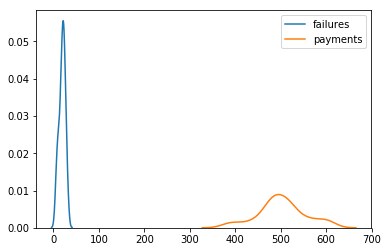

In [5]:
sns.kdeplot(failure_count, label='failures')
sns.kdeplot(payment_count, label='payments')

In [6]:
failures_df

,payments,failures
day_of_the_month,,
1,517,22
2,463,6
3,486,11
4,509,31
5,460,24
6,488,24
7,481,23
8,493,13
9,554,17


In [7]:
expected, observed = calculate_expected_population(failures_df.failures, failures_df.payments)

In [8]:
expected

day_of_the_month
1     19.862898
2     17.788243
3     18.671892
4     19.555541
5     17.672984
6     18.748731
7     18.479794
8     18.940829
9     21.284420
10    19.401863
11    19.209765
12    19.017668
13    19.901317
14    14.791519
15    19.363444
16    18.479794
17    21.438098
18    23.359075
19    21.899133
20    15.252554
21    16.366720
22    18.364536
23    20.362351
24    23.051719
25    20.285512
26    18.441375
27    22.744362
28    16.904594
29    18.134019
30    19.978156
31    20.247093
Name: payments, dtype: float64

In [9]:
observed

day_of_the_month
1     22
2      6
3     11
4     31
5     24
6     24
7     23
8     13
9     17
10    26
11     7
12    24
13    19
14    20
15    25
16     8
17    20
18    18
19    27
20    15
21    30
22    10
23    16
24    23
25    17
26    21
27    11
28    19
29    20
30    23
31    28
Name: failures, dtype: int64

In [10]:
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 30)   # Df = number of variable categories - 1

print("Critical value")
print(crit)

Critical value
43.7729718257


In [11]:
stats.chisquare(f_obs= observed,   # Array of observed counts
                f_exp= expected)   # Array of expected counts

Power_divergenceResult(statistic=75.675690719607772, pvalue=8.1099083501129358e-06)

Since our chi-squared statistic exceeds the critical value, we'd reject the null hypothesis that the two distributions are the same.

**There is a statistical difference between the expected counts and the actual counts**

### Example 2

In this example, the failures and the payment are a direct linear combination of each other! (plus some random noise)

In [12]:
failure_count = np.random.normal(20, 6, 31).astype(int)
payment_count = (25 * failure_count ) + np.random.normal(20, 10, 31).astype(int)

failures_df = pd.DataFrame({'failures':failure_count, 'payments':payment_count}, index=pd.Index(range(1,32), name='day_of_the_month'))

In [13]:
failures_df

,failures,payments
day_of_the_month,,
1,22,555
2,25,666
3,19,500
4,19,495
5,25,651
6,20,537
7,25,639
8,11,292
9,15,384


I created the dataset so that there is a very constant ratio between the payments and the failures

In [14]:
failures_df.failures/failures_df.payments

day_of_the_month
1     0.039640
2     0.037538
3     0.038000
4     0.038384
5     0.038402
6     0.037244
7     0.039124
8     0.037671
9     0.039062
10    0.039604
11    0.037559
12    0.035714
13    0.039560
14    0.038978
15    0.038202
16    0.038793
17    0.038462
18    0.037671
19    0.037464
20    0.038265
21    0.037402
22    0.038251
23    0.037807
24    0.039246
25    0.038889
26    0.038934
27    0.040070
28    0.038369
29    0.038627
30    0.038618
31    0.036885
dtype: float64

In [15]:
expected, observed = calculate_expected_population(failures_df.failures, failures_df.payments)

In [16]:
expected

day_of_the_month
1     21.300098
2     25.560118
3     19.189278
4     18.997385
5     24.984439
6     20.609284
7     24.523897
8     11.206538
9     14.737365
10    19.381170
11    24.523897
12    12.895195
13    17.462243
14    28.553645
15    17.078457
16    17.807650
17    14.967636
18    22.413076
19    13.317359
20    15.044394
21    19.496306
22    21.069827
23    20.302256
24    24.447140
25    13.816280
26    18.728735
27    22.029291
28    16.003857
29     8.942203
30    18.882249
31    18.728735
Name: payments, dtype: float64

In [17]:
observed

day_of_the_month
1     22
2     25
3     19
4     19
5     25
6     20
7     25
8     11
9     15
10    20
11    24
12    12
13    18
14    29
15    17
16    18
17    15
18    22
19    13
20    15
21    19
22    21
23    20
24    25
25    14
26    19
27    23
28    16
29     9
30    19
31    18
Name: failures, dtype: int64

In [18]:
stats.chisquare(f_obs= observed,   # Array of observed counts
                f_exp= expected)   # Array of expected counts

Power_divergenceResult(statistic=0.31581855371583623, pvalue=1.0)

The results tell that they are **STRONGLY NOT STATISTICAL SIGNIFICANT!** the expected distribution always match the actual distribution!

### Example 3

In [137]:
failure_count = np.random.randint(10, 50, 31)

failures_df = pd.DataFrame({'failures':failure_count}, index=pd.Index(range(1,32), name='day_of_the_month'))
failures_df['payments'] = (failure_df.index.values * 3 + 10) * failure_count

In [138]:
failures_df

,failures,payments
day_of_the_month,,
1,15,195
2,47,752
3,24,456
4,37,814
5,31,775
6,23,644
7,23,713
8,40,1360
9,47,1739


In [139]:
expected, observed = calculate_expected_population(failures_df.failures, failures_df.payments)

In [143]:
print(np.c_[expected, observed])

[[  3.39944789  15.        ]
 [ 13.10966571  47.        ]
 [  7.94947814  24.        ]
 [ 14.19051581  37.        ]
 [ 13.51062623  31.        ]
 [ 11.22689457  23.        ]
 [ 12.42977613  23.        ]
 [ 23.7089699   40.        ]
 [ 30.31610195  47.        ]
 [ 30.68219634  44.        ]
 [ 14.24281501  19.        ]
 [ 10.42497353  13.        ]
 [ 35.87725004  42.        ]
 [ 32.63469974  36.        ]
 [ 43.1468386   45.        ]
 [ 26.28906368  26.        ]
 [ 21.26834064  20.        ]
 [ 13.38859477  12.        ]
 [ 42.04855544  36.        ]
 [ 40.2703827   33.        ]
 [ 25.45227651  20.        ]
 [ 37.09756466  28.        ]
 [ 27.54424444  20.        ]
 [ 47.17387687  33.        ]
 [ 28.15440175  19.        ]
 [ 47.55740433  31.        ]
 [ 58.69713357  37.        ]
 [ 16.38708214  10.        ]
 [ 49.03921494  29.        ]
 [ 81.93541068  47.        ]
 [ 62.8462033   35.        ]]


In [144]:
stats.chisquare(f_obs= observed,   # Array of observed counts
                f_exp= expected)   # Array of expected counts

Power_divergenceResult(statistic=336.89880308711048, pvalue=1.2910725439753253e-53)

**Statistically significant!** the two distributions are different!

## Chi-Squared Test of Independence

Independence is a key concept in probability that describes a situation where knowing the value of one variable tells you nothing about the value of another. For instance, the month you were born probably doesn't tell you anything about which web browser you use, so we'd expect birth month and browser preference to be independent. On the other hand, the day of the month might be related to failure rates, so day of the month and failure rates might not be independent.

As with the goodness-of-fit test, we can use scipy to conduct a test of independence quickly. Use stats.chi2_contingency() function to conduct a test of independence automatically given a frequency table of observed counts:

### Failure rates: EXAMPLE 1

Example of no statistical significance

In [41]:
failure_count = np.random.normal(20, 6, 31).astype(int)
payment_count = np.random.normal(500, 50, 31).astype(int)

failure_df = pd.DataFrame({'failures':failure_count, 'payments':payment_count}, index=pd.Index(range(1,32), name='day_of_the_month'))

In [42]:
failure_df

,failures,payments
day_of_the_month,,
1,32,547
2,16,546
3,19,511
4,15,509
5,19,564
6,6,599
7,24,463
8,15,488
9,19,426


In [43]:
stats.chi2_contingency(observed= failure_df)

(45.826169368503336,
 0.032280715233732354,
 30,
 array([[  20.17142498,  558.82857502],
        [  19.57917243,  542.42082757],
        [  18.46434411,  511.53565589],
        [  18.2553138 ,  505.7446862 ],
        [  20.31077852,  562.68922148],
        [  21.07722299,  583.92277701],
        [  16.96629355,  470.03370645],
        [  17.52370771,  485.47629229],
        [  15.50308137,  429.49691863],
        [  18.22047541,  504.77952459],
        [  16.374041  ,  453.625959  ],
        [  15.05018237,  416.94981763],
        [  14.52760659,  402.47239341],
        [  17.69789964,  490.30210036],
        [  16.47855616,  456.52144384],
        [  19.85787951,  550.14212049],
        [  17.90692995,  496.09307005],
        [  19.09143504,  528.90856496],
        [  17.3146774 ,  479.6853226 ],
        [  19.40498051,  537.59501949],
        [  16.19984908,  448.80015092],
        [  20.3456169 ,  563.6543831 ],
        [  18.74305119,  519.25694881],
        [  15.6772733 ,  434.32

The output shows the chi-square statistic, the p-value and the degrees of freedom followed by the expected counts. Given the p-value < 0.05, the test result detect a (small) **significant** relationship between the variables.

#### EXAMPLE 2
Let's make another example, this time there is a very close relationship between variables counts, but indipendent from the day of the month

In [44]:
failure_count = np.random.normal(20, 6, 31).astype(int)
payment_count = (25 * failure_count ) + np.random.normal(20, 10, 31).astype(int)

failure_df = pd.DataFrame({'failures':failure_count, 'payments':payment_count}, index=pd.Index(range(1,32), name='day_of_the_month'))

In [45]:
failure_df

,failures,payments
day_of_the_month,,
1,22,558
2,21,565
3,13,347
4,13,339
5,30,771
6,15,387
7,21,550
8,47,1190
9,17,430


In [46]:
stats.chi2_contingency(observed= failure_df)

(0.32120782722119107, 1.0, 30, array([[   21.48556231,   558.51443769],
        [   21.70782675,   564.29217325],
        [   13.33586626,   346.66413374],
        [   13.03951368,   338.96048632],
        [   29.67230243,   771.32769757],
        [   14.89171733,   387.10828267],
        [   21.15216565,   549.84783435],
        [   45.82351824,  1191.17648176],
        [   16.55870061,   430.44129939],
        [   14.18787994,   368.81212006],
        [   12.33567629,   320.66432371],
        [    4.66755319,   121.33244681],
        [   20.55946049,   534.44053951],
        [   28.78324468,   748.21675532],
        [   25.26405775,   656.73594225],
        [   14.26196809,   370.73803191],
        [   19.07769757,   495.92230243],
        [   24.44908815,   635.55091185],
        [   15.18806991,   394.81193009],
        [   15.29920213,   397.70079787],
        [   13.59517477,   353.40482523],
        [   17.89228723,   465.10771277],
        [   22.5968845 ,   587.4031155 ],
    

in this case, the tot paymets is a linear relatioship from the failure, but the day of the month as no influence on the counts and in this case there the p-value is 1!!

The output shows the chi-square statistic, the p-value and the degrees of freedom followed by the expected counts.
As expected, given the high p-value, the test result does not detect a significant relationship between the variables.

### EXAMPLE 3

In this example the relatioship will be linear with the number of day

In [59]:
failure_count = np.random.randint(10, 50, 31)

failure_df = pd.DataFrame({'failures':failure_count}, index=pd.Index(range(1,32), name='day_of_the_month'))
failure_df['payment'] = (failure_df.index.values * 3 + 10) * failure_count

In [60]:
failure_df

,failures,payment
day_of_the_month,,
1,35,455
2,40,640
3,13,247
4,14,308
5,24,600
6,23,644
7,31,961
8,19,646
9,14,518


In [61]:
stats.chi2_contingency(observed= failure_df)

(317.64755868011611,
 8.6279614135563891e-50,
 30,
 array([[  8.16011236e+00,   4.81839888e+02],
        [  1.13242376e+01,   6.68675762e+02],
        [  4.32985554e+00,   2.55670144e+02],
        [  5.36235955e+00,   3.16637640e+02],
        [  1.03916533e+01,   6.13608347e+02],
        [  1.11077448e+01,   6.55892255e+02],
        [  1.65200642e+01,   9.75479936e+02],
        [  1.10744382e+01,   6.53925562e+02],
        [  8.85955056e+00,   5.23140449e+02],
        [  2.18491172e+01,   1.29015088e+03],
        [  3.37062600e+01,   1.99029374e+03],
        [  3.05254815e+01,   1.80247452e+03],
        [  2.66452648e+01,   1.57335474e+03],
        [  1.50046148e+01,   8.85995385e+02],
        [  1.77191011e+01,   1.04628090e+03],
        [  3.14414125e+01,   1.85655859e+03],
        [  1.96175762e+01,   1.15838242e+03],
        [  2.16492777e+01,   1.27835072e+03],
        [  2.37808989e+01,   1.40421910e+03],
        [  3.78362761e+01,   2.23416372e+03],
        [  1.84851525e+01,   

**Statistically significant!** In this case there is a very close relationship between the specific day, and the total number in payments and failures. In fact the p-value here is very small!!!!

The day of the month tell me something about the failed and payments

#### SUMMARY

In [145]:
pd.DataFrame({'2 random normal (Example 1)':[True, True], 'Linear combination (Example 2)':[False, False], 'Linear combination of failures and day (Example 3)':[True, True]}, index=pd.Index(['Chi-squared goodnes of fit', 'Chi-squared test of indipendence'], name='Test'))

,2 random normal (Example 1),Linear combination (Example 2),Linear combination of failures and day (Example 3)
Test,,,
Chi-squared goodnes of fit,True,False,True
Chi-squared test of indipendence,True,False,True
